## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [7]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [169]:
data_details = pd.read_csv("Datasets/Dictionary.csv",encoding='latin-1')
data_details

S.No.      Variable Name   \
0       1         CustomerID    
1       2             Gender    
2       3       SeniorCitizen   
3       4            Partner    
4       5          Dependents   
5       6              Tenure   
6       7      PhoneService     
7       8       MultipleLines   
8       9    InternetService    
9      10     OnlineSecurity    
10     11       OnlineBackup    
11     12   DeviceProtection    
12     13        TechSupport    
13     14         StreamingTV   
14     15    StreamingMovies    
15     16          Contract     
16     17  PaperlessBilling     
17     18      PaymentMethod    
18     19     MonthlyCharges    
19     20       TotalCharges    
20     21             Churn     

                                              Meaning  
0                      The unique ID of each customer  
1                              The gender of a person  
2   Whether a customer can be classified as a seni...  
3   If a customer is married/ in a live-in relatio...  
4   If a customer has dependents (children/ retire...  
5   The time for which a customer has been using t...  
6   Whether a customer has a landline phone servic...  
7   Whether a customer has multiple lines of inter...  
8   The type of internet services chosen by the cu...  
9        Specifies if a customer has online security.  
10         Specifies if a customer has online backup.  
11  Specifies if a customer has opted for device p...  
12  Whether a customer has opted for tech support ...  
13  Whether a customer has an option of TV streaming.  
14  Whether a customer has an option of Movie stre...  
15        The type of contract a customer has chosen.  
16  Whether a customer has opted for paperless bil...  
17      Specifies the method by which bills are paid.  
18  Specifies the money paid by a customer each mo...  
19  The total money paid by the customer to the co...  
20  This is the target variable which specifies if...

In [9]:
# Importing all datasets
churn_data = pd.read_csv("Datasets/churn_data.csv")
churn_data.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [10]:
customer_data = pd.read_csv("Datasets/customer_data.csv")
customer_data.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [11]:
internet_data = pd.read_csv("Datasets/internet_data.csv")
internet_data.head()

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No

#### Combining all data files into one consolidated dataframe

In [12]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [13]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [14]:
# Let's see the head of our master dataset
telecom.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      Yes         No  No phone service             DSL             No   
1       No         No                No             DSL            Yes   
2       No         No                No             DSL            Yes   
3       No         No  No phone service             DSL            Yes   
4       No         No                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

In [15]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [16]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
max      72.000000      118.750000       1.000000

In [17]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [18]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [19]:
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   Partner  Dependents     MultipleLines InternetService OnlineSecurity  \
0        1           0  No phone service             DSL             No   
1        0           0                No             DSL            Yes   
2        0           0                No             DSL            Yes   
3        0           0  No phone service             DSL            Yes   
4        0           0                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No  

[5 rows x 21 columns]

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [20]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [21]:
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   StreamingTV  StreamingMovies  Contract_One year Contract_Two year  \
0           No               No              False             False   
1           No               No               True             False   
2           No               No              False             False   
3           No               No               True             False   
4           No               No              False             False   

  PaymentMethod_Credit card (automatic) PaymentMethod_Electronic check  \
0                                 False                           True   
1                                 False                          False   
2                                 False                          False   
3                                 False                          False   
4                                 False                           True   

  PaymentMethod_Mailed check gender_Male InternetService_Fiber optic  \
0                      False       False                       False   
1                       True        True                       False   
2                       True        True                       False   
3                      False        True                       False   
4                      False       False                        True   

  InternetService_No  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 29 columns]

In [22]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)


In [23]:

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)


In [24]:

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)


In [25]:

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)


In [26]:

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)


In [27]:

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)


In [28]:

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [29]:
telecom.head()

customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0            False              True                 True   
1             True             False                False   
2            False              True                 True   
3             True             False                False   
4             True             False                 True   

  DeviceProtection_Yes TechSupport_No TechSupport_Yes StreamingTV_No  \
0                False           True           False           True   
1                 True           True           False           True   
2                False           True           False           True   
3                 True          False            True           True   
4                False           True           False           True   

  StreamingTV_Yes StreamingMovies_No StreamingMovies_Yes  
0           False               True               False  
1           False               True               False  
2           False               True               False  
3           False               True               False  
4           False               True               False  

[5 rows x 43 columns]

## Dropping the repeated variables

In [30]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [31]:
# Assuming 'TotalCharges' column contains strings that represent numeric values
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

# 'coerce' option will replace any parsing errors with NaN values


In [32]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

Now you can see that you have all variables as numeric.

## Checking for Outliers

In [33]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [34]:
num_telecom.head()

tenure  MonthlyCharges  SeniorCitizen  TotalCharges
0       1           29.85              0         29.85
1      34           56.95              0       1889.50
2       2           53.85              0        108.15
3      45           42.30              0       1840.75
4       2           70.70              0        151.65

In [35]:
num_telecom.describe()

tenure  MonthlyCharges  SeniorCitizen  TotalCharges
count  7043.000000     7043.000000    7043.000000   7032.000000
mean     32.371149       64.761692       0.162147   2283.300441
std      24.559481       30.090047       0.368612   2266.771362
min       0.000000       18.250000       0.000000     18.800000
25%       9.000000       35.500000       0.000000    401.450000
50%      29.000000       70.350000       0.000000   1397.475000
75%      55.000000       89.850000       0.000000   3794.737500
max      72.000000      118.750000       1.000000   8684.800000

## ***Plotting boxplots for the variable***
- ## **MonthlyCharges**
- ## **TotalChagres**

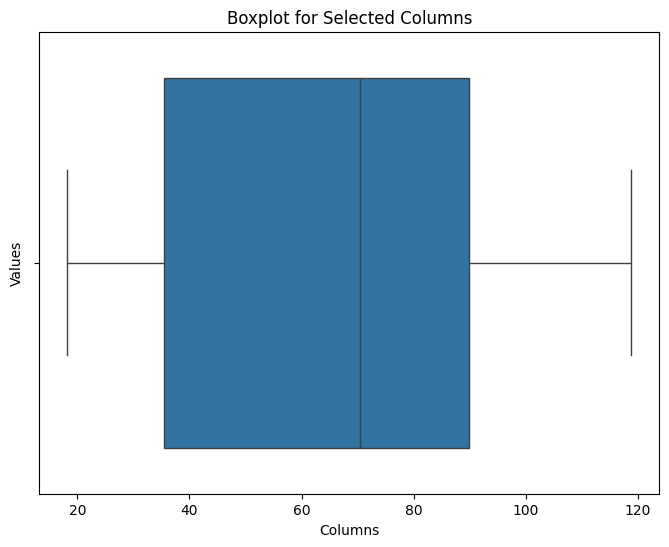

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=telecom,x=telecom['MonthlyCharges'])
plt.title('Boxplot for Selected Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

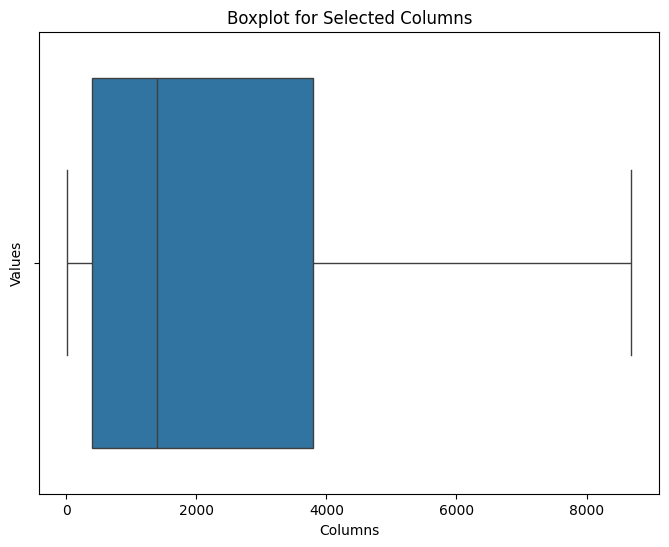

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=telecom,x=telecom['TotalCharges'])
plt.title('Boxplot for Selected Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

In [38]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

tenure  MonthlyCharges  SeniorCitizen  TotalCharges
count  7043.000000     7043.000000    7043.000000   7032.000000
mean     32.371149       64.761692       0.162147   2283.300441
std      24.559481       30.090047       0.368612   2266.771362
min       0.000000       18.250000       0.000000     18.800000
25%       9.000000       35.500000       0.000000    401.450000
50%      29.000000       70.350000       0.000000   1397.475000
75%      55.000000       89.850000       0.000000   3794.737500
90%      69.000000      102.600000       1.000000   5976.640000
95%      72.000000      107.400000       1.000000   6923.590000
99%      72.000000      114.729000       1.000000   8039.883000
max      72.000000      118.750000       1.000000   8684.800000

From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Checking for Missing Values and Imputing Them

In [39]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [40]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [41]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [42]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

## Step 4: Test-Train Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0       1             0                 1           29.85         29.85   
1      34             1                 0           56.95       1889.50   
2       2             1                 1           53.85        108.15   
3      45             0                 0           42.30       1840.75   
4       2             1                 1           70.70        151.65   

   SeniorCitizen  Partner  Dependents  Contract_One year  Contract_Two year  \
0              0        1           0              False              False   
1              0        0           0               True              False   
2              0        0           0              False              False   
3              0        0           0               True              False   
4              0        0           0              False              False   

   ...  OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0  ...            False              True                 True   
1  ...             True             False                False   
2  ...            False              True                 True   
3  ...             True             False                False   
4  ...             True             False                 True   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                 False            True            False            True   
1                  True            True            False            True   
2                 False            True            False            True   
3                  True           False             True            True   
4                 False            True            False            True   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0            False                True                False  
1            False                True                False  
2            False                True                False  
3            False                True                False  
4            False                True                False  

[5 rows x 30 columns]

In [45]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
879   0.019693             1                 1       -0.338074     -0.276449   
5790  0.305384             0                 1       -0.464443     -0.112702   
6498 -1.286319             1                 1        0.581425     -0.974430   
880  -0.919003             1                 1        1.505913     -0.550676   
2784 -1.163880             1                 1        1.106854     -0.835971   

      SeniorCitizen  Partner  Dependents  Contract_One year  \
879               0        0           0              False   
5790              0        1           1              False   
6498              0        0           0              False   
880               0        0           0              False   
2784              0        0           1              False   

      Contract_Two year  ...  OnlineBackup_No  OnlineBackup_Yes  \
879               False  ...            False              True   
5790              False  ...            False              True   
6498              False  ...            False              True   
880               False  ...            False              True   
2784              False  ...             True             False   

      DeviceProtection_No  DeviceProtection_Yes  TechSupport_No  \
879                  True                 False            True   
5790                 True                 False            True   
6498                False                  True            True   
880                 False                  True           False   
2784                False                  True           False   

      TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
879             False            True            False                True   
5790            False           False             True               False   
6498            False            True            False                True   
880              True           False             True               False   
2784             True           False             True               False   

      StreamingMovies_Yes  
879                 False  
5790                 True  
6498                False  
880                  True  
2784                 True  

[5 rows x 30 columns]

In [49]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

## Step 6: Looking at Correlations

In [50]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   bool   
 11  Contract_

In [52]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [53]:
telecom['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

## - **Dropping the ***customerID*** column from the telecom dataset.**
## - **and creating the ***tele_corr*** variableand creating the correlation table**

In [54]:
tele_corr = telecom.drop('customerID',axis=1,inplace=True)


In [55]:
tele_corr

In [56]:
telecom_corr = telecom.corr()
telecom_corr

tenure  PhoneService  \
tenure                                 1.000000      0.007877   
PhoneService                           0.007877      1.000000   
PaperlessBilling                       0.004823      0.016696   
MonthlyCharges                         0.246862      0.248033   
TotalCharges                           0.825880      0.113008   
Churn                                 -0.354049      0.011691   
SeniorCitizen                          0.015683      0.008392   
Partner                                0.381912      0.018397   
Dependents                             0.163386     -0.001078   
Contract_One year                      0.202338     -0.003142   
Contract_Two year                      0.563801      0.004442   
PaymentMethod_Credit card (automatic)  0.232800     -0.006916   
PaymentMethod_Electronic check        -0.210197      0.002747   
PaymentMethod_Mailed check            -0.232181     -0.004463   
gender_Male                            0.005285     -0.007515   
InternetService_Fiber optic            0.017930      0.290183   
InternetService_No                    -0.037529      0.171817   
MultipleLines_No                      -0.323891      0.315218   
MultipleLines_Yes                      0.332399      0.279530   
OnlineSecurity_No                     -0.265987     -0.058546   
OnlineSecurity_Yes                     0.328297     -0.091676   
OnlineBackup_No                       -0.314769     -0.092579   
OnlineBackup_Yes                       0.361138     -0.052133   
DeviceProtection_No                   -0.314820     -0.075421   
DeviceProtection_Yes                   0.361520     -0.070076   
TechSupport_No                        -0.264363     -0.055102   
TechSupport_Yes                        0.325288     -0.095138   
StreamingTV_No                        -0.246814     -0.123159   
StreamingTV_Yes                        0.280264     -0.021383   
StreamingMovies_No                    -0.252890     -0.111273   
StreamingMovies_Yes                    0.285402     -0.033477   

                                       PaperlessBilling  MonthlyCharges  \
tenure                                         0.004823        0.246862   
PhoneService                                   0.016696        0.248033   
PaperlessBilling                               1.000000        0.351930   
MonthlyCharges                                 0.351930        1.000000   
TotalCharges                                   0.157830        0.651065   
Churn                                          0.191454        0.192858   
SeniorCitizen                                  0.156258        0.219874   
Partner                                       -0.013957        0.097825   
Dependents                                    -0.110131       -0.112343   
Contract_One year                             -0.052278        0.004810   
Contract_Two year                             -0.146281       -0.073256   
PaymentMethod_Credit card (automatic)         -0.013726        0.030055   
PaymentMethod_Electronic check                 0.208427        0.271117   
PaymentMethod_Mailed check                    -0.203981       -0.376568   
gender_Male                                   -0.011902       -0.013779   
InternetService_Fiber optic                    0.326470        0.787195   
InternetService_No                            -0.320592       -0.763191   
MultipleLines_No                              -0.151974       -0.338514   
MultipleLines_Yes                              0.163746        0.490912   
OnlineSecurity_No                              0.267592        0.360220   
OnlineSecurity_Yes                            -0.004051        0.296447   
OnlineBackup_No                                0.144218        0.210126   
OnlineBackup_Yes                               0.127056        0.441529   
DeviceProtection_No                            0.166253        0.171057   
DeviceProtection_Yes                           0.104079        0.482607   
TechSuppor

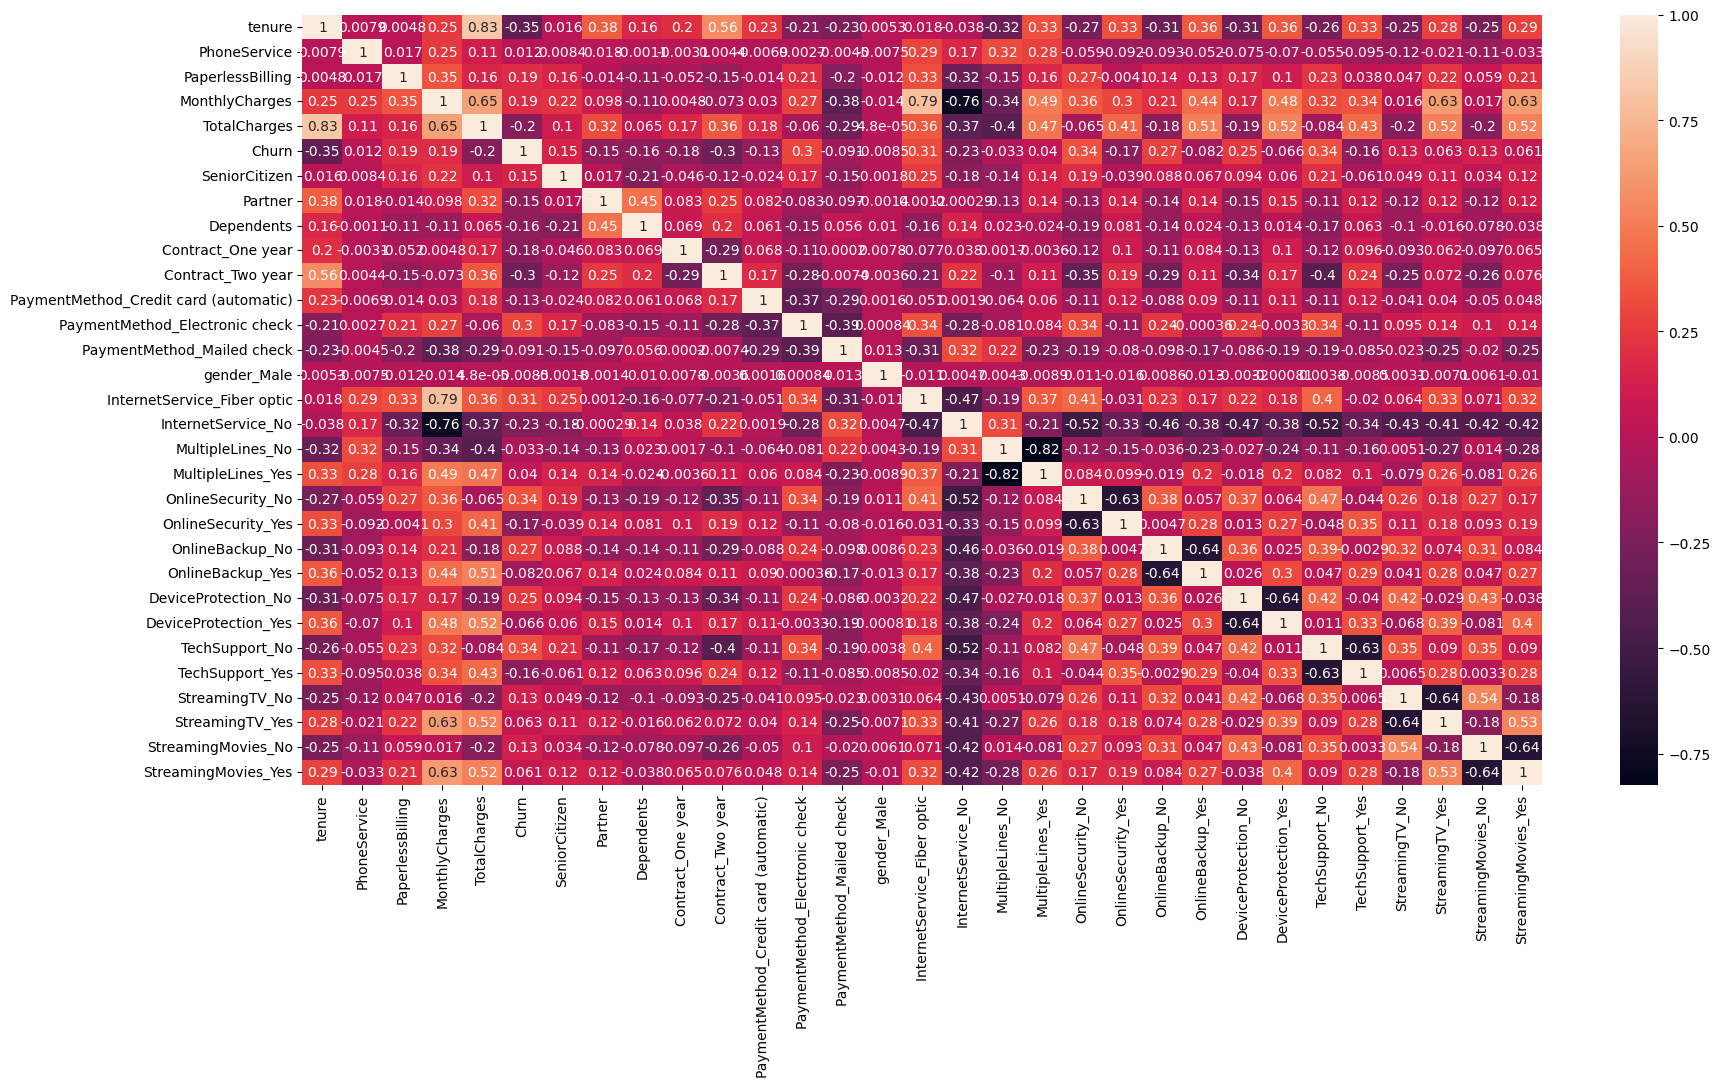

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_corr,annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [58]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

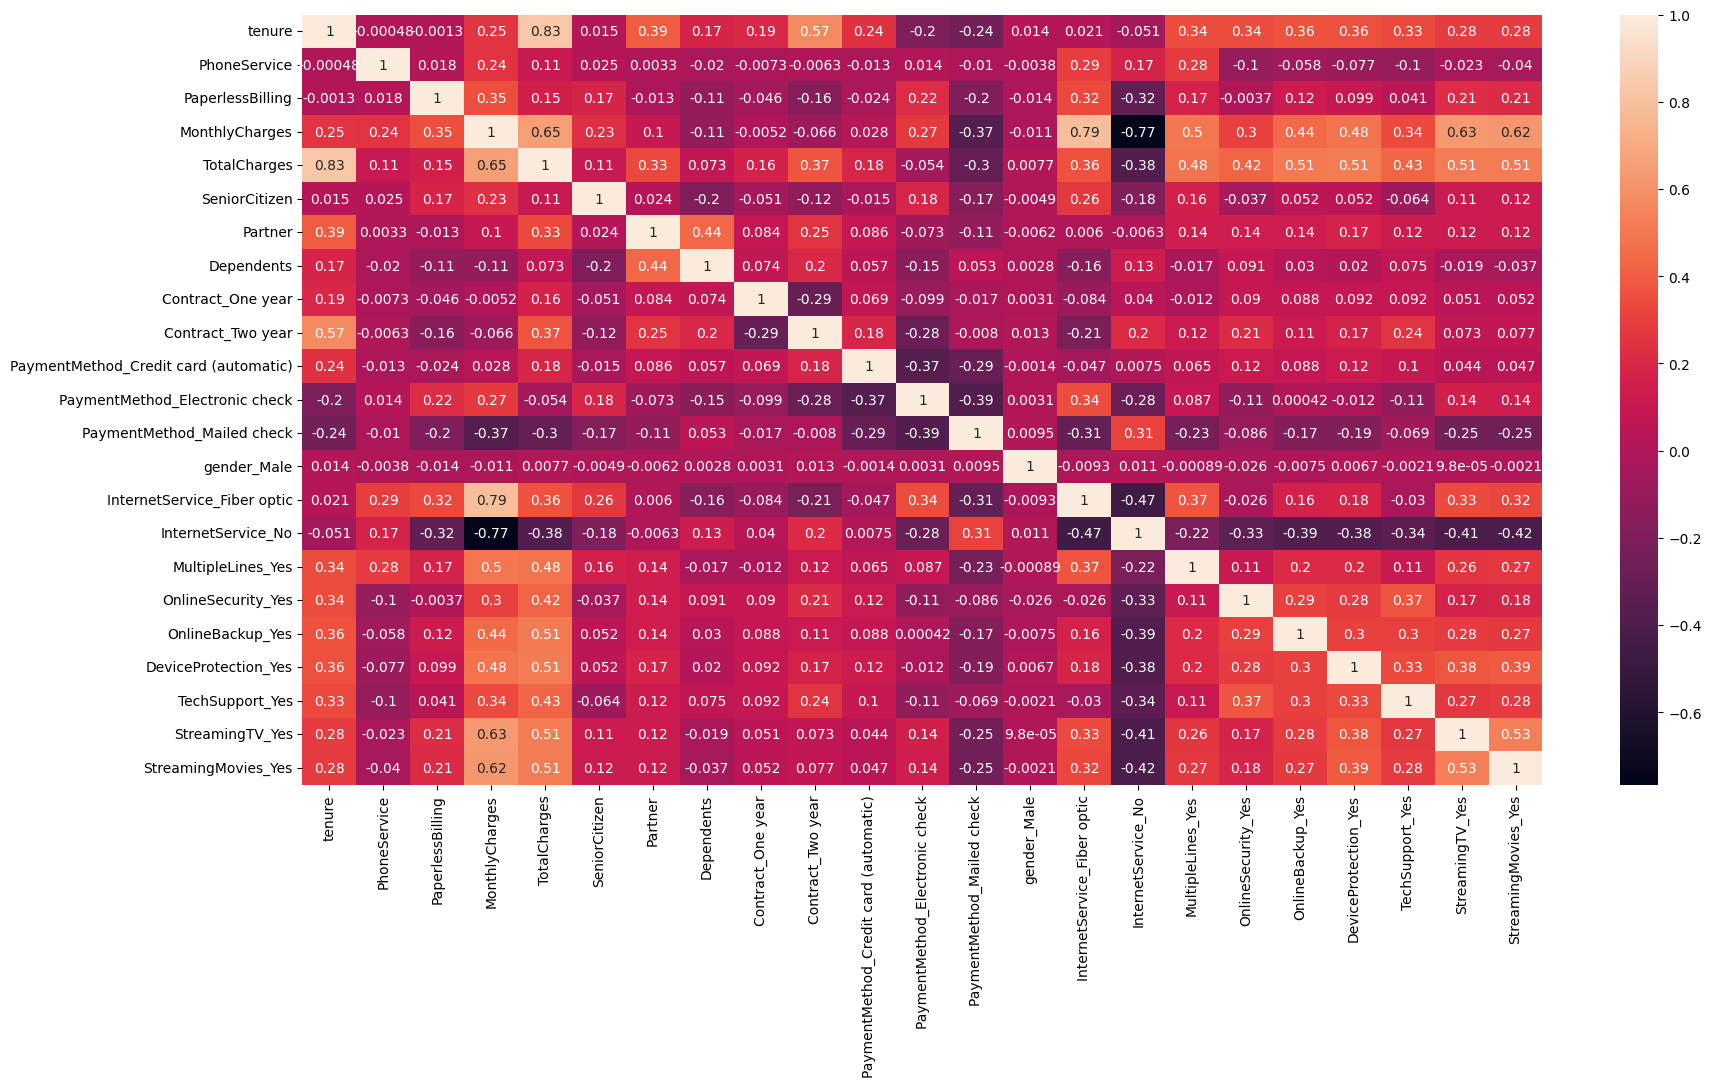

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [60]:
import statsmodels.api as sm

In [61]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4922 entries, 879 to 5649
Series name: Churn
Non-Null Count  Dtype
--------------  -----
4922 non-null   int64
dtypes: int64(1)
memory usage: 76.9 KB


## **Here i have passed the ***X_train.astype(int)*** as I was getting the error assocaited with the**
## ***Panda data cast to numpy dtypoe of onject*** 

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(int))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.7
Date:                Tue, 06 Feb 2024   Deviance:                       4037.4
Time:                        01:17:41   Pearson chi2:                 5.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2803
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9649      0.216     -4.468      0.000      -1.388      -0.542
tenure                                   -1.0401      0.091    -11.438      0.000      -1.218      -0.862
PhoneService                             -0.4162      0.167     -2.495      0.013      -0.743      -0.089
PaperlessBilling                          0.3119      0.090      3.473      0.001       0.136       0.488
MonthlyCharges                            0.2035      0.141      1.445      0.148      -0.073       0.480
TotalCharges                             -0.0445      0.115     -0.387      0.699      -0.270       0.181
SeniorCitizen                             0.3415      0.101      3.392      0.001       0.144       0.539
Partner                                  -0.0227      0.092     -0.246      0.806      -0.204       0.158
Dependents                               -0.1274      0.107     -1.194      0.233      -0.337       0.082
Contract_One year                        -0.8627      0.126     -6.833      0.000      -1.110      -0.615
Contract_Two year                        -1.4803      0.211     -7.031      0.000      -1.893      -1.068
PaymentMethod_Credit card (automatic)    -0.2265      0.136     -1.669      0.095      -0.492       0.040
PaymentMethod_Electronic check            0.2225      0.112      1.993      0.046       0.004       0.441
PaymentMethod_Mailed check               -0.1708      0.137     -1.251      0.211      -0.438       0.097
gender_Male                              -0.0375      0.078     -0.479      0.632      -0.191       0.116
InternetService_Fiber optic               0.8007      0.113      7.055      0.000       0.578       1.023
InternetService_No                       -0.8865      0.195     -4.549      0.000      -1.268      -0.505
MultipleLines_Yes                         0.1820      0.095      1.922      0.055      -0.004       0.368
OnlineSecurity_Yes                       -0.4024      0.102     -3.944      0.000      -0.602      -0.202
OnlineBackup_Yes                         -0.2295      0.091     -2.513      0.012      -0.409      -0.051
DeviceProtection_Yes                     -0.0468      0.095     -0.492      0.623      -0.233       0.140
TechSupport_Yes                          -0.3725      0.102     -3.649      0.000      -0.573      -0.172
StreamingTV_Yes                           0.2253      0.102      2.201      0.028       0.025       0.426
StreamingMovies_Yes                       0.1555      0.101      1.533      0.125      -0.043       0.354
=========================================================================================================
"""

## Step 8: Feature Selection Using RFE

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE

# Assuming you have already initialized your logistic regression model (logreg),
# and X_train, y_train are your training data and labels respectively.

# Create RFE object without specifying the number of features initially
rfe = RFE(estimator=logreg, n_features_to_select=13)  # Choose 13 features OR Running RFE with 13 variables as output

# Fit RFE to your training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [65]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 5),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 8),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 6),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 10),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 4),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 11),
 ('TechSupport_Yes', False, 3),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [67]:
col = X_train.columns[rfe.support_]

In [68]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

### Assessing the model with StatsModels

In [69]:
X_train_sm = sm.add_constant(X_train[col].astype(int))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.5
Date:                Tue, 06 Feb 2024   Deviance:                       4104.9
Time:                        01:17:43   Pearson chi2:                 5.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4141      0.112    -12.582      0.000      -1.634      -1.194
tenure                                   -1.1486      0.087    -13.247      0.000      -1.318      -0.979
MonthlyCharges                           -0.1255      0.124     -1.010      0.312      -0.369       0.118
TotalCharges                             -0.0626      0.113     -0.554      0.579      -0.284       0.159
SeniorCitizen                             0.4440      0.097      4.563      0.000       0.253       0.635
Contract_One year                        -1.0366      0.123     -8.444      0.000      -1.277      -0.796
Contract_Two year                        -1.8063      0.206     -8.776      0.000      -2.210      -1.403
PaymentMethod_Credit card (automatic)    -0.4057      0.111     -3.654      0.000      -0.623      -0.188
PaymentMethod_Mailed check               -0.3741      0.110     -3.406      0.001      -0.589      -0.159
InternetService_Fiber optic               0.9290      0.102      9.101      0.000       0.729       1.129
InternetService_No                       -0.9911      0.175     -5.675      0.000      -1.333      -0.649
MultipleLines_Yes                         0.1778      0.092      1.933      0.053      -0.003       0.358
StreamingTV_Yes                           0.3242      0.099      3.285      0.001       0.131       0.518
StreamingMovies_Yes                       0.2718      0.098      2.787      0.005       0.081       0.463
=========================================================================================================
"""

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.225072
5790    0.306164
6498    0.660029
880     0.496342
2784    0.756564
3874    0.195583
5387    0.465042
6623    0.783330
4465    0.135317
5364    0.391447
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22507155, 0.30616397, 0.66002883, 0.49634191, 0.75656385,
       0.19558296, 0.46504224, 0.78333005, 0.13531664, 0.39144748])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [72]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.225072     879
1      0    0.306164    5790
2      1    0.660029    6498
3      1    0.496342     880
4      1    0.756564    2784

### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.225072     879          0
1      0    0.306164    5790          0
2      1    0.660029    6498          1
3      1    0.496342     880          0
4      1    0.756564    2784          1

In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3288  347]
 [ 644  643]]


In [76]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7986590816741163


### Checking VIFs

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Here I have done the same type conversion**

In [79]:
X_train[col] = X_train[col].astype(int)

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                          MonthlyCharges  4.63
9                      InternetService_No  3.46
8             InternetService_Fiber optic  2.78
2                            TotalCharges  2.72
11                        StreamingTV_Yes  2.58
12                    StreamingMovies_Yes  2.57
5                       Contract_Two year  2.56
10                      MultipleLines_Yes  2.21
0                                  tenure  2.03
4                       Contract_One year  1.60
7              PaymentMethod_Mailed check  1.54
6   PaymentMethod_Credit card (automatic)  1.40
3                           SeniorCitizen  1.29

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [81]:
# col = col.drop('PhoneService', 1)
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.5
Date:                Tue, 06 Feb 2024   Deviance:                       4104.9
Time:                        01:17:43   Pearson chi2:                 5.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2704
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4141      0.112    -12.582      0.000      -1.634      -1.194
tenure                                   -1.1486      0.087    -13.247      0.000      -1.318      -0.979
MonthlyCharges                           -0.1255      0.124     -1.010      0.312      -0.369       0.118
TotalCharges                             -0.0626      0.113     -0.554      0.579      -0.284       0.159
SeniorCitizen                             0.4440      0.097      4.563      0.000       0.253       0.635
Contract_One year                        -1.0366      0.123     -8.444      0.000      -1.277      -0.796
Contract_Two year                        -1.8063      0.206     -8.776      0.000      -2.210      -1.403
PaymentMethod_Credit card (automatic)    -0.4057      0.111     -3.654      0.000      -0.623      -0.188
PaymentMethod_Mailed check               -0.3741      0.110     -3.406      0.001      -0.589      -0.159
InternetService_Fiber optic               0.9290      0.102      9.101      0.000       0.729       1.129
InternetService_No                       -0.9911      0.175     -5.675      0.000      -1.333      -0.649
MultipleLines_Yes                         0.1778      0.092      1.933      0.053      -0.003       0.358
StreamingTV_Yes                           0.3242      0.099      3.285      0.001       0.131       0.518
StreamingMovies_Yes                       0.2718      0.098      2.787      0.005       0.081       0.463
=========================================================================================================
"""

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.22507155, 0.30616397, 0.66002883, 0.49634191, 0.75656385,
       0.19558296, 0.46504224, 0.78333005, 0.13531664, 0.39144748])

In [85]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.225072     879          0
1      0    0.306164    5790          0
2      1    0.660029    6498          1
3      1    0.496342     880          0
4      1    0.756564    2784          1

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7986590816741163


So overall the accuracy hasn't dropped much.

### Let's check the VIFs again

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                          MonthlyCharges  4.63
9                      InternetService_No  3.46
8             InternetService_Fiber optic  2.78
2                            TotalCharges  2.72
11                        StreamingTV_Yes  2.58
12                    StreamingMovies_Yes  2.57
5                       Contract_Two year  2.56
10                      MultipleLines_Yes  2.21
0                                  tenure  2.03
4                       Contract_One year  1.60
7              PaymentMethod_Mailed check  1.54
6   PaymentMethod_Credit card (automatic)  1.40
3                           SeniorCitizen  1.29

In [89]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [90]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.6
Date:                Tue, 06 Feb 2024   Deviance:                       4105.2
Time:                        01:17:43   Pearson chi2:                 5.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2703
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4184      0.112    -12.640      0.000      -1.638      -1.198
tenure                                   -1.1638      0.082    -14.156      0.000      -1.325      -1.003
MonthlyCharges                           -0.1400      0.121     -1.154      0.249      -0.378       0.098
SeniorCitizen                             0.4421      0.097      4.550      0.000       0.252       0.632
Contract_One year                        -1.0488      0.121     -8.678      0.000      -1.286      -0.812
Contract_Two year                        -1.8391      0.197     -9.314      0.000      -2.226      -1.452
PaymentMethod_Credit card (automatic)    -0.4063      0.111     -3.660      0.000      -0.624      -0.189
PaymentMethod_Mailed check               -0.3759      0.110     -3.422      0.001      -0.591      -0.161
InternetService_Fiber optic               0.9259      0.102      9.075      0.000       0.726       1.126
InternetService_No                       -0.9875      0.174     -5.660      0.000      -1.329      -0.645
MultipleLines_Yes                         0.1746      0.092      1.901      0.057      -0.005       0.355
StreamingTV_Yes                           0.3238      0.099      3.278      0.001       0.130       0.517
StreamingMovies_Yes                       0.2719      0.098      2.785      0.005       0.081       0.463
=========================================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [92]:
y_train_pred[:10]

array([0.22377733, 0.30519026, 0.66178811, 0.49079395, 0.75527772,
       0.19490745, 0.47138094, 0.7838037 , 0.13336463, 0.38883453])

In [93]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [94]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.223777     879          0
1      0    0.305190    5790          0
2      1    0.661788    6498          1
3      1    0.490794     880          0
4      1    0.755278    2784          1

In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7978464039008533


The accuracy is still practically the same.

### Let's now check the VIFs again

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                          MonthlyCharges  4.27
8                      InternetService_No  3.46
7             InternetService_Fiber optic  2.71
10                        StreamingTV_Yes  2.58
11                    StreamingMovies_Yes  2.56
4                       Contract_Two year  2.40
9                       MultipleLines_Yes  2.19
0                                  tenure  1.78
3                       Contract_One year  1.57
6              PaymentMethod_Mailed check  1.54
5   PaymentMethod_Credit card (automatic)  1.40
2                           SeniorCitizen  1.29

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [97]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3289,  346],
       [ 649,  638]], dtype=int64)

In [98]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7978464039008533

## Metrics beyond simply accuracy

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.49572649572649574

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.9048143053645117

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0951856946354883


In [104]:
# positive predictive value 
print (TP / float(TP+FP))

0.6483739837398373


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.835195530726257


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

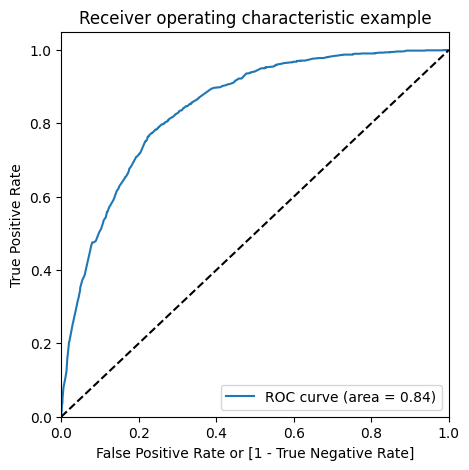

In [108]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.223777     879          0    1    1    1    0    0    0    0   
1      0    0.305190    5790          0    1    1    1    1    0    0    0   
2      1    0.661788    6498          1    1    1    1    1    1    1    1   
3      1    0.490794     880          0    1    1    1    1    1    0    0   
4      1    0.755278    2784          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    0    0

In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.617229  0.941725  0.502338
0.2   0.2  0.714344  0.857032  0.663824
0.3   0.3  0.764120  0.783217  0.757359
0.4   0.4  0.785656  0.660451  0.829986
0.5   0.5  0.797846  0.495726  0.904814
0.6   0.6  0.790329  0.322455  0.955983
0.7   0.7  0.771231  0.173271  0.982944
0.8   0.8  0.746038  0.035742  0.997524
0.9   0.9  0.738521  0.000000  1.000000


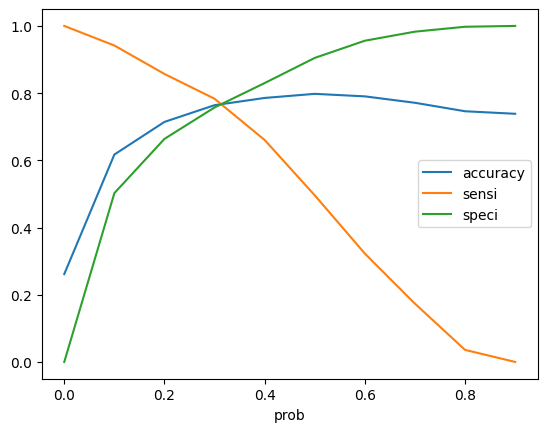

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.223777     879          0    1    1    1    0    0    0    0   
1      0    0.305190    5790          0    1    1    1    1    0    0    0   
2      1    0.661788    6498          1    1    1    1    1    1    1    1   
3      1    0.490794     880          0    1    1    1    1    1    0    0   
4      1    0.755278    2784          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                1  
2    0    0    0                1  
3    0    0    0                1  
4    1    0    0                1

In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7641202763104429

In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2753,  882],
       [ 279, 1008]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7832167832167832

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.7573590096286107

In [118]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24264099037138928


In [119]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5333333333333333


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9079815303430079


## Precision and Recall

In [121]:
#Looking at the confusion matrix again

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3289,  346],
       [ 649,  638]], dtype=int64)

##### Precision
TP / TP + FP

In [123]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6483739837398373

##### Recall
TP / TP + FN

In [124]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.49572649572649574

Using sklearn utilities for the same

In [125]:
from sklearn.metrics import precision_score, recall_score

In [165]:
# ?precision_score

In [127]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6483739837398373

In [128]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.49572649572649574

### Precision and recall tradeoff

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final['Churn']

0       0
1       0
2       1
3       1
4       1
       ..
4917    0
4918    0
4919    0
4920    0
4921    0
Name: Churn, Length: 4922, dtype: int64

In [131]:
y_train_pred_final['predicted']

0       0
1       0
2       1
3       0
4       1
       ..
4917    0
4918    0
4919    0
4920    0
4921    0
Name: predicted, Length: 4922, dtype: int64

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

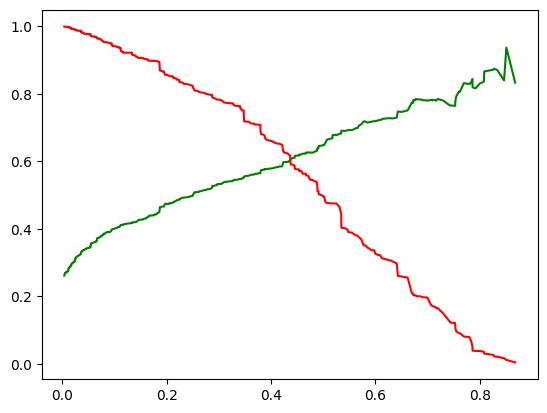

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [134]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [135]:
X_test = X_test[col]
X_test.head()

tenure  MonthlyCharges  SeniorCitizen  Contract_One year  \
942  -0.347623        0.499951              0              False   
3730  0.999203        1.319685              0              False   
1761  1.040015       -1.342374              0              False   
2283 -1.286319        0.223935              0              False   
1872  0.346196       -1.500335              0              False   

      Contract_Two year  PaymentMethod_Credit card (automatic)  \
942               False                                   True   
3730              False                                   True   
1761               True                                   True   
2283              False                                  False   
1872               True                                  False   

      PaymentMethod_Mailed check  InternetService_Fiber optic  \
942                        False                         True   
3730                       False                         True   
1761                       False                        False   
2283                        True                         True   
1872                       False                        False   

      InternetService_No  MultipleLines_Yes  StreamingTV_Yes  \
942                False              False            False   
3730               False               True             True   
1761                True               True            False   
2283               False              False            False   
1872                True              False            False   

      StreamingMovies_Yes  
942                  True  
3730                 True  
1761                False  
2283                False  
1872                False

In [136]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [137]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 942 to 4987
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  2110 non-null   float64
 1   tenure                                 2110 non-null   float64
 2   MonthlyCharges                         2110 non-null   float64
 3   SeniorCitizen                          2110 non-null   int64  
 4   Contract_One year                      2110 non-null   bool   
 5   Contract_Two year                      2110 non-null   bool   
 6   PaymentMethod_Credit card (automatic)  2110 non-null   bool   
 7   PaymentMethod_Mailed check             2110 non-null   bool   
 8   InternetService_Fiber optic            2110 non-null   bool   
 9   InternetService_No                     2110 non-null   bool   
 10  MultipleLines_Yes                      2110 non-null   bool   
 11  Streami

## **Here I have created the ***float_columns*** having the float type**

In [138]:
float_columns = X_test_sm.select_dtypes(include=['float64'])

In [139]:
float_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 942 to 4987
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           2110 non-null   float64
 1   tenure          2110 non-null   float64
 2   MonthlyCharges  2110 non-null   float64
dtypes: float64(3)
memory usage: 65.9 KB


In [140]:
# X_test_sm[float_columns] = X_test_sm[float_columns].astype(int)
# running this code will throw an error

## **Here is the error I encountered while runnign this code**
![X_test_sm Error.png](<attachment:X_test_sm Error.png>)
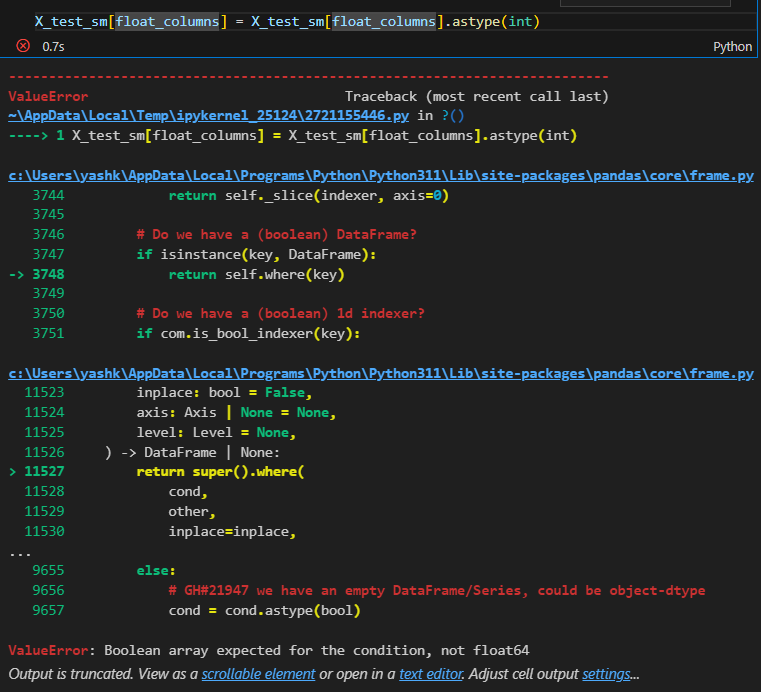

## **Running the code for a sample_df and predicting the ***y_test_pred*** usng the ***res*** model** 

In [141]:
# sample_df = X_test_sm.astype(int)

In [142]:
# sample_df.info()

In [143]:
# sample_df_pred = res.predict(sample_df)

## **Converting the X_test_sm type into ***integer*****

In [144]:
X_test_sm = X_test_sm.astype(int)

In [145]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 942 to 4987
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   const                                  2110 non-null   int32
 1   tenure                                 2110 non-null   int32
 2   MonthlyCharges                         2110 non-null   int32
 3   SeniorCitizen                          2110 non-null   int32
 4   Contract_One year                      2110 non-null   int32
 5   Contract_Two year                      2110 non-null   int32
 6   PaymentMethod_Credit card (automatic)  2110 non-null   int32
 7   PaymentMethod_Mailed check             2110 non-null   int32
 8   InternetService_Fiber optic            2110 non-null   int32
 9   InternetService_No                     2110 non-null   int32
 10  MultipleLines_Yes                      2110 non-null   int32
 11  StreamingTV_Yes                  

In [146]:
y_test_pred = res.predict(X_test_sm)

In [147]:
y_test_pred[:10]

942     0.348223
3730    0.433291
1761    0.004069
2283    0.573301
1872    0.016223
1970    0.730093
2532    0.344433
1616    0.011196
2485    0.421194
5914    0.194907
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [149]:
# Let's see the head
y_pred_1.head()

0
942   0.348223
3730  0.433291
1761  0.004069
2283  0.573301
1872  0.016223

In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [151]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final.head()

Churn  CustID         0
0      0     942  0.348223
1      1    3730  0.433291
2      0    1761  0.004069
3      1    2283  0.573301
4      0    1872  0.016223

In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

## **Here changing the ***Reindex_axis*** method to ***reindex*** as the previous got outdated**

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Churn  Churn_Prob
0     942      0    0.348223
1    3730      1    0.433291
2    1761      0    0.004069
3    2283      1    0.573301
4    1872      0    0.016223

In [158]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [159]:
y_pred_final.head()

CustID  Churn  Churn_Prob  final_predicted
0     942      0    0.348223                0
1    3730      1    0.433291                1
2    1761      0    0.004069                0
3    2283      1    0.573301                1
4    1872      0    0.016223                0

In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7729857819905214

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1259,  269],
       [ 210,  372]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6391752577319587

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.8239528795811518